In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

As it can be seen, we have a clean data with ni missing values and no incorrect datatype.

It can be seen that data has some features which has been produced using PCA and we do not have information about them.

0    284315
1       492
Name: Class, dtype: int64


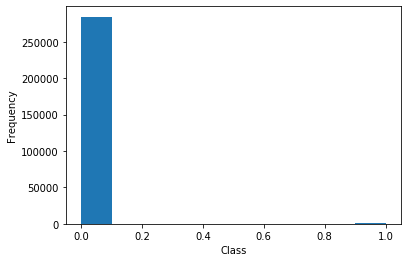

In [6]:
df['Class'].plot(kind='hist')
plt.xlabel('Class')
print(df['Class'].value_counts())

We can see data is highly skewed. We have 492 fraud cases while 284315 non fraud cases.

Now we are going to perform undersampling of our data, which is important because due to skewness our model will not be a good model. Our model will be trained mostly on non fraud data. And secondly we will not be able to observe correct correlations of features with the transaction amount.

At this point we should also note that we cannnot perform testing on undersampled or oversampled data.So before undersampling we are going to split our dataset.

In [7]:
X=df.drop('Class',axis=1)
y=df['Class']

In [8]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

    

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [9]:
len(original_ytrain[original_ytrain==1])

394

### Creating the subsample(undersampling). 
Suffling the dataset and taking random 492 values from the non fraud cases to make the number of both the cases equal.

In [10]:
# Lets shuffle the data before creating the subsamples

df_tr=pd.concat([original_Xtrain,original_ytrain],axis=1)
df_tr=df_tr.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df_tr.loc[df_tr['Class'] == 1]
non_fraud_df = df_tr.loc[df_tr['Class'] == 0][:394]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

In [11]:
new_df['Class'].value_counts()

1    394
0    394
Name: Class, dtype: int64

Text(0.5, 0, 'Class')

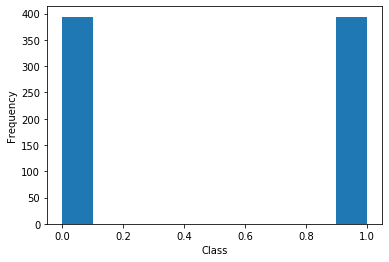

In [12]:
new_df['Class'].plot(kind='hist')
plt.xlabel('Class')

It can be seen that we have equated both the classes.

Before proceding further we can make few assumptions based on intuition:
- Transaction amount should have impact on the class because higher amount may be more inclined towards a fraud case.
- Time of transaction should not effect the decision that whether the transaction is fraud or non fraud.
For other features we can't say anything right now.

We can say that there is a non linear relationship in the dataset and we can try certain models such as random forest, Knn for future predictions.

### Let's perform some exploratory data analysis to gain insights.

Text(0, 0.5, 'Probability')

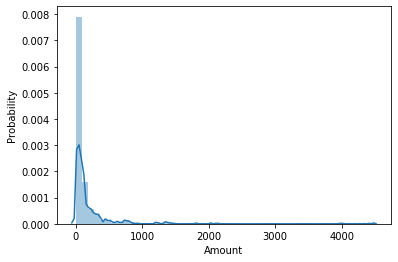

In [13]:
sns.distplot(new_df['Amount'])
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

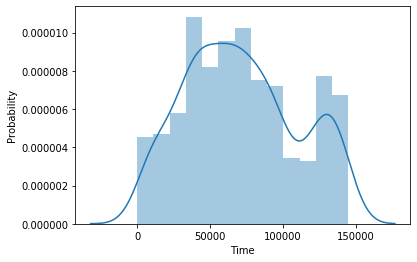

In [14]:
sns.distplot(new_df['Time'])
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

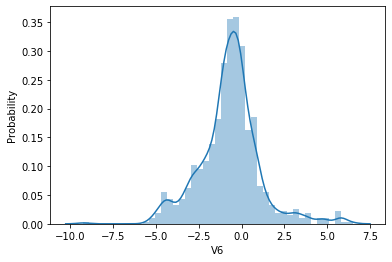

In [15]:
sns.distplot(new_df['V6'])
plt.ylabel('Probability')

We observe that amount distribution is highly skewed 

In [16]:
new_df[['Amount', 'Class']].groupby(['Class'], as_index=False).mean().sort_values(by='Amount', ascending=False)

,Class,Amount
1,1,123.172970
0,0,103.475838


Text(232.77500000000003, 0.5, 'frequency')

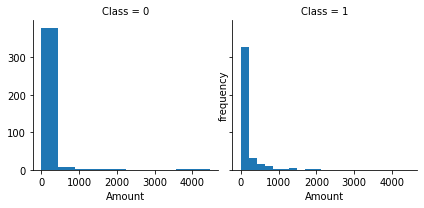

In [17]:
g = sns.FacetGrid(new_df, col='Class')
g.map(plt.hist, 'Amount')
plt.ylabel('frequency')
plt.ylabel('frequency')

Here we can say that The amount of transaction in fraud cases are higher than the non fraud case on an average.

We can say that amount will be an important feature for modelling of the fraud cases.

In [18]:
new_df[['Time', 'Class']].groupby(['Class'], as_index=False).mean().sort_values(by='Time', ascending=False)

,Class,Time
0,0,79973.751269
1,1,62970.449239


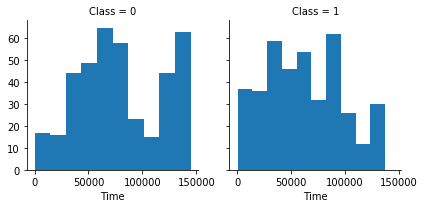

In [19]:
g = sns.FacetGrid(new_df, col='Class')
g.map(plt.hist, 'Time')

We can say about time that

Let's look at if there are any outliers present

Text(0, 0.5, 'Value')

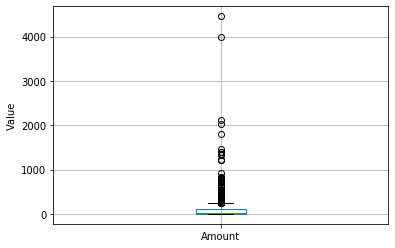

In [20]:
new_df.boxplot(column=['Amount'])
plt.ylabel('Value')

Text(0, 0.5, 'Value')

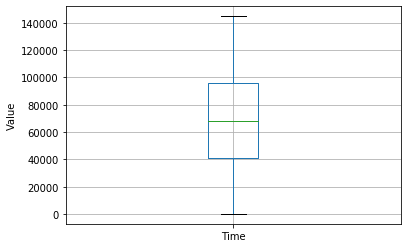

In [21]:
new_df.boxplot(column=['Time'])
plt.ylabel('Value')

Text(0, 0.5, 'Value')

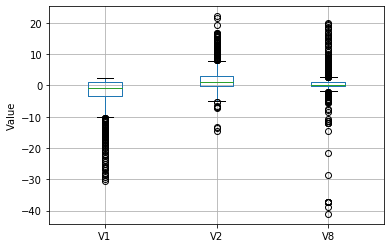

In [22]:
new_df.boxplot(column=['V1','V2','V8'])
plt.ylabel('Value')

We can see that some outiers are present in Amount and other unknown features, but there are no outliers in Time.

As a next step we can remove these outliers from the dataset.

In [23]:
new_df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.210237,-0.177323,0.154375,-0.266433,0.199623,0.216403,0.149099,-0.178762,0.129836,...,-0.068505,0.141737,0.077246,0.039207,-0.184256,-0.097808,-0.187265,-0.038525,-0.016992,-0.222615
V1,0.210237,1.000000,-0.823726,0.898923,-0.655327,0.886674,0.340107,0.894615,-0.084447,0.691971,...,0.021539,-0.035287,-0.040212,-0.084610,-0.054237,0.070276,0.190672,0.209995,-0.030926,-0.458643
V2,-0.177323,-0.823726,1.000000,-0.866944,0.691369,-0.804891,-0.289051,-0.859919,-0.023902,-0.703941,...,0.024550,0.024741,0.209403,0.002299,0.123319,-0.066341,-0.168464,-0.015988,-0.288205,0.518024
V3,0.154375,0.898923,-0.866944,1.000000,-0.792682,0.882666,0.467416,0.897610,-0.173856,0.774102,...,0.038668,-0.070657,-0.038973,-0.005527,-0.067686,0.017340,0.114837,0.150981,0.001894,-0.576301
V4,-0.266433,-0.655327,0.691369,-0.792682,1.000000,-0.636250,-0.423889,-0.746322,0.103378,-0.808081,...,-0.037351,0.150026,0.011840,-0.025755,-0.066829,0.109478,-0.010521,-0.109019,0.013767,0.704237
V5,0.199623,0.886674,-0.804891,0.882666,-0.636250,1.000000,0.334614,0.848240,-0.210941,0.695668,...,0.049288,-0.108151,-0.106485,-0.155661,-0.060841,0.087933,0.209976,0.167253,-0.089232,-0.434045
V6,0.216403,0.340107,-0.289051,0.467416,-0.423889,0.334614,1.000000,0.294103,-0.623910,0.364803,...,0.039565,-0.010576,0.359898,-0.111043,-0.143316,-0.061222,-0.203800,-0.003649,0.160146,-0.387316
V7,0.149099,0.894615,-0.859919,0.897610,-0.746322,0.848240,0.294103,1.000000,0.093488,0.789362,...,0.053599,-0.139948,-0.108208,-0.054752,0.077399,0.048616,0.245856,0.176966,0.131942,-0.504199
V8,-0.178762,-0.084447,-0.023902,-0.173856,0.103378,-0.210941,-0.623910,0.093488,1.000000,-0.063665,...,-0.120055,0.042189,-0.442466,0.092962,0.250430,0.053738,0.303005,-0.008930,0.015307,0.065491
V9,0.129836,0.691971,-0.703941,0.774102,-0.808081,0.695668,0.364803,0.789362,-0.063665,1.000000,...,0.180263,-0.292424,-0.072321,-0.008161,0.026754,-0.074161,0.171282,0.181998,0.047202,-0.558387


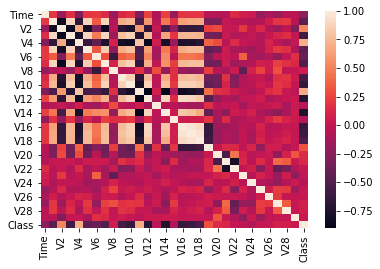

In [24]:
sns.heatmap(new_df.corr())

We can see that there are few features from V1 to V28 to retain, while others are of not much use.

Also time also have less relation with Class.

we are going to retrain whole data and select model accordingly.

In [25]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,...,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,71472.100254,-2.829095,2.073223,-3.736715,2.436181,-2.047186,-0.700061,-3.283576,0.311698,-1.365236,...,0.391659,-0.025446,-0.039626,-0.035137,0.059102,0.030818,0.091804,0.025156,113.324404,0.500000
std,38214.255562,5.967019,4.002191,6.801277,3.267452,4.523818,1.791040,6.386985,5.391544,2.468919,...,3.093908,1.248737,1.263750,0.562765,0.694236,0.487277,1.076123,0.429846,308.999518,0.500318
min,78.000000,-30.552380,-14.633869,-31.103685,-4.477790,-22.105532,-9.246060,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.327335,-4.781606,-1.275309,-7.263482,-1.869290,0.000000,0.000000
25%,41300.000000,-3.463320,-0.116012,-5.165340,0.063270,-2.439906,-1.560613,-3.809399,-0.238142,-2.415843,...,-0.175718,-0.548755,-0.269415,-0.384714,-0.295588,-0.285177,-0.074556,-0.071960,1.290000,0.000000
50%,68207.000000,-0.950780,1.073396,-1.163936,1.385925,-0.633838,-0.639502,-0.720961,0.159708,-0.741852,...,0.140054,0.026653,-0.044594,0.033414,0.111754,-0.049711,0.039862,0.030770,18.150000,0.500000
75%,95730.500000,0.988754,3.130336,0.527766,4.361974,0.314749,0.079473,0.237848,0.918480,0.131433,...,0.758086,0.533652,0.186709,0.383208,0.424287,0.325954,0.454933,0.206210,99.990000,1.000000
max,144838.000000,2.330400,22.057729,3.324665,12.114672,13.546621,6.474115,5.802537,20.007208,5.966670,...,27.202839,8.361985,5.466230,1.272344,2.208209,2.745261,3.052358,1.779364,4457.430000,1.000000


In [26]:
# Removing the outlier from amount
new_df=new_df[new_df['Amount']<1000]

In [27]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [28]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [30]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(original_Xtrain, original_ytrain)
    y_pred=classifier.predict(original_Xtest)
    print(f1_score(original_ytest,y_pred))

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.4126984126984127
0.81437125748503
0.6808510638297872


In [31]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(original_Xtrain, original_ytrain)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# Random Forest
rand_params={'n_estimators': [20, 10, 30], 'max_depth': [2,4,8,None]}
grid_rand = GridSearchCV(RandomForestClassifier(), rand_params)
grid_rand.fit(original_Xtrain, original_ytrain)

# Random forest estimator
grid_rand = grid_rand.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(original_Xtrain, original_ytrain)

# tree best estimator
tree_clf = grid_tree.best_estimator_

F:\Softwares\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Softwares\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Softwares\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\Softwares\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Softwares\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Softwares\anaconda\lib\site-packages\sklearn\